# Process a folder of images

The code makes a few assumptions regarding the image file names:

1. The image file name ends with an underscore and a number (with leading zeros) before the extension. For example: "WD6mm_05.tif"
2. Matching images are numbered consecutively with the odd number coming first. For example: "WD6mm_05.tif" and "WD6mm_06.tif" or "WD6mm_01.tif" and "WD6mm_02.tif".
   
This means that you should always start with an odd number (e.g. 01) and then image alternately with the SE and InLens detectors.
   
This also means that "WD6mm_02.tif" and "WD6mm_03.tif" will not be considered matching images (because the odd number is larger than the even number).

In [1]:
from pathlib import Path
import pandas as pd
from skimage.io import imsave, imread
import stackview
import carde


In [2]:
image_folder = Path("../../data/cloud/ALL SEM Images")
output_folder = image_folder / "results"

## Show an example input image

[[150 147 149 ... 132 131 128]
 [145 146 150 ... 125 123 126]
 [134 144 145 ... 121 116 122]
 ...
 [  0   0   0 ...   0 116 118]
 [113 111 107 ... 117 122 119]
 [115 115 111 ... 116 114 117]]
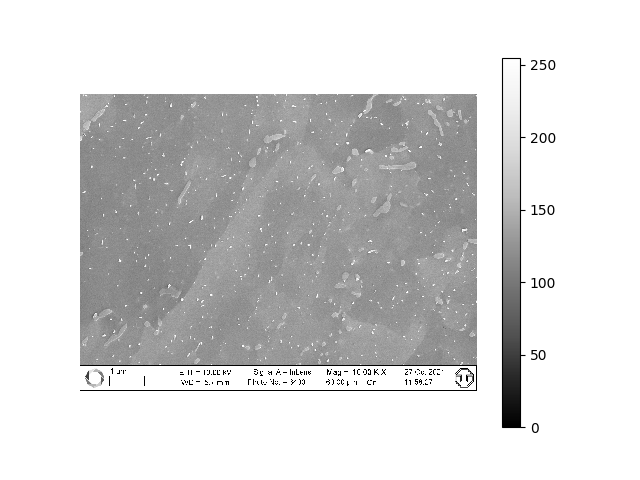
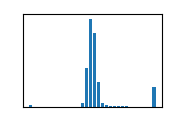

In [3]:
stackview.insight(imread(image_folder / "WD6mm_01.tif"))

## Process all images in the input folder

In [4]:
carde.process_folder(image_folder, output_folder)

Processing ..\..\data\cloud\ALL SEM Images\WD6mm_01.tif
Processing ..\..\data\cloud\ALL SEM Images\WD6mm_03.tif
Processing ..\..\data\cloud\ALL SEM Images\WD6mm_05.tif
Processing ..\..\data\cloud\ALL SEM Images\WD6mm_07.tif
Processing ..\..\data\cloud\ALL SEM Images\WD6mm_09.tif
Processing ..\..\data\cloud\ALL SEM Images\WD6mm_11.tif
Processing ..\..\data\cloud\ALL SEM Images\WD6mm_13.tif
Processing ..\..\data\cloud\ALL SEM Images\WD6mm_15.tif
Processing ..\..\data\cloud\ALL SEM Images\WD6mm_17.tif
Processing ..\..\data\cloud\ALL SEM Images\WD6mm_19.tif
Processing ..\..\data\cloud\ALL SEM Images\WD6mm_21.tif
Processing ..\..\data\cloud\ALL SEM Images\WD6mm_23.tif
Processing ..\..\data\cloud\ALL SEM Images\WD6mm_25.tif
Processing ..\..\data\cloud\ALL SEM Images\WD6mm_27.tif
Processing ..\..\data\cloud\ALL SEM Images\WD6mm_29.tif
Processing ..\..\data\cloud\ALL SEM Images\WD6mm_31.tif
Processing ..\..\data\cloud\ALL SEM Images\WD6mm_33.tif
Processing ..\..\data\cloud\ALL SEM Images\WD6mm

# Show the overlay of the mask with the resulting image

[[[153 153 153]
  [150 150 150]
  [152 152 152]
  ...
  [130 130 130]
  [129 129 129]
  [130 130 130]]

 [[151 151 151]
  [149 149 149]
  [152 152 152]
  ...
  [128 128 128]
  [126 126 126]
  [128 128 128]]

 [[140 140 140]
  [148 148 148]
  [146 146 146]
  ...
  [125 125 125]
  [123 123 123]
  [126 126 126]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [131 131 131]
  [132 132 132]]

 [[126 126 126]
  [126 126 126]
  [118 118 118]
  ...
  [130 130 130]
  [136 136 136]
  [131 131 131]]

 [[127 127 127]
  [123 123 123]
  [122 122 122]
  ...
  [128 128 128]
  [127 127 127]
  [129 129 129]]]
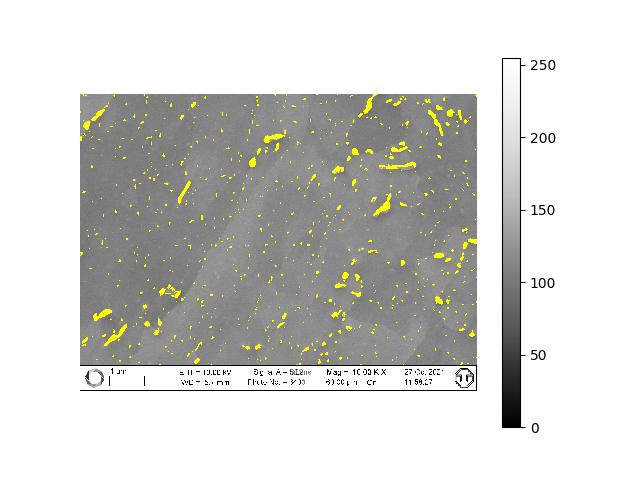
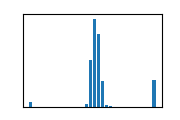

In [5]:
stackview.insight(imread(output_folder / "WD6mm_01-02_overlay.bmp"))

## Show the individual segmented objects

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
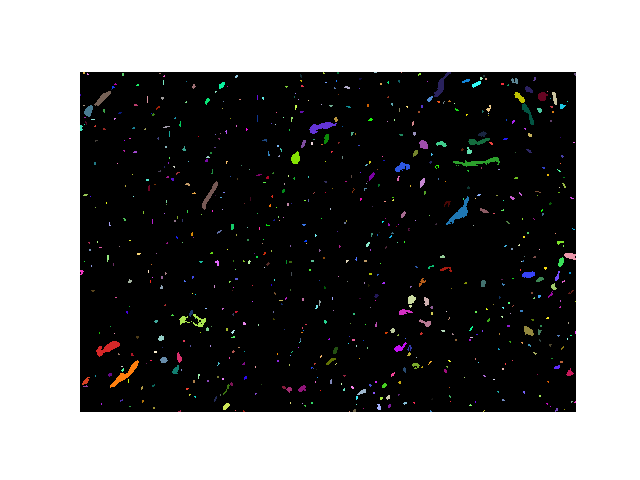

In [6]:
stackview.insight(imread(output_folder / "WD6mm_01-02_label.tif"))

## Show the results table

In [7]:
df = pd.read_csv(output_folder / "WD6mm_01-02_table.csv")
df

,Unnamed: 0,label,area,axis_major_length,axis_minor_length,centroid-0,centroid-1,orientation
0,0,1,0.101728,0.761923,0.243220,3.236470,8.717425,-0.698447
1,1,2,0.097377,0.941444,0.160568,6.942002,1.036089,-0.851780
2,2,3,0.091914,1.252138,0.143766,2.086561,9.118825,-1.483455
3,3,4,0.087099,0.652600,0.198438,6.335345,0.633489,-1.133322
4,4,5,0.080710,0.682050,0.182584,1.280642,5.525241,-1.312430
...,...,...,...,...,...,...,...,...
807,807,808,0.000093,0.012830,0.007407,4.353704,0.098148,-0.785398
808,808,809,0.000093,0.012830,0.007407,5.379630,2.937037,0.785398
809,809,810,0.000093,0.012830,0.007407,6.524074,2.103704,0.785398
810,810,811,0.000093,0.012830,0.007407,7.453704,11.279630,0.785398
